In [11]:
"""
Authors: Mariusz Krzyzopolski s21544 Tomasz Baj s20499
"""

'\nAuthors: Mariusz Krzyzopolski s21544 Tomasz Baj s20499\n'

In [12]:
import os
import time
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
tf.keras.utils.disable_interactive_logging()

Num GPUs Available:  0


In [ ]:
"""Checking available GPU with CUDA for training and disabling it"""
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [13]:
""" Prepare test and train datasets """
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
"""Creation and compilation of custom model, adjusted to fashion minst dataset problem"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
"""Train model with base time benchmark"""
start = time.time()
history = model.fit(train_images, train_labels, epochs=10)
print("time: ", time.time()-start, "s")

time:  30.412781715393066 s


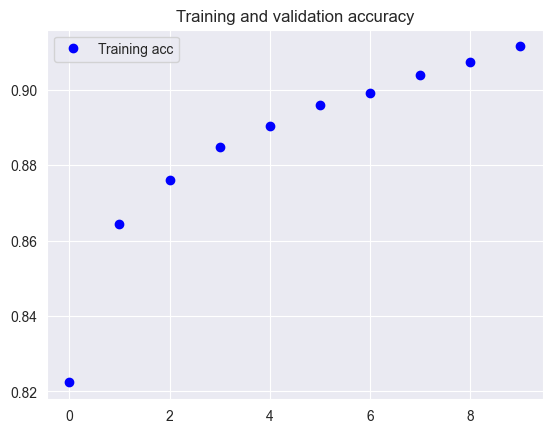


Test accuracy: 0.8813999891281128


In [16]:
"""Benchmark of accuracy, with dependency of epoch"""
plt.plot(list(range(10)), history.history["accuracy"], 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [17]:
"""Creation and compilation of custom, smaller model for comparison"""
model_smaller = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_smaller.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
"""Train model with base time benchmark"""
start = time.time()
history_smaller = model_smaller.fit(train_images, train_labels, epochs=10)
print("time: ", time.time()-start, "s")

time:  16.147327184677124 s


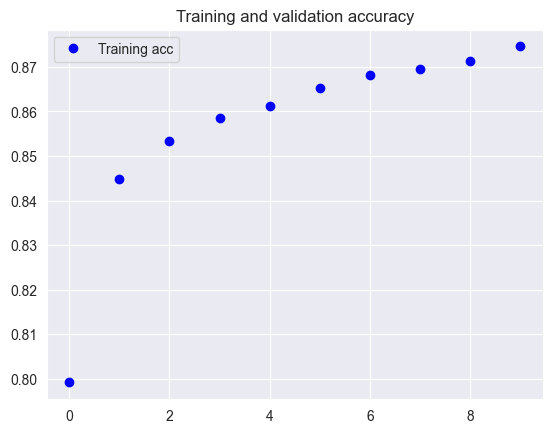


Test accuracy: 0.8493000268936157


In [19]:
"""Benchmark of accuracy, with dependency of epoch"""
plt.plot(list(range(10)), history_smaller.history["accuracy"], 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model_smaller.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)